<a href="https://colab.research.google.com/github/SudeeptaJena/Celebal-Technologies-Assignments/blob/main/spamemailsasg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('spambase.data', header=None)

# Define the feature columns and target column
feature_cols = data.columns[:-1]
target_col = data.columns[-1]

# Split the dataset into features (X) and target (y)
X = data[feature_cols]
y = data[target_col]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled and X_test_scaled are ready for model training


In [2]:
!pip install catboost

In [3]:
from sklearn.metrics import log_loss
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the models
xgb_model = xgb.XGBClassifier()
catboost_model = CatBoostClassifier()

# Define the parameter grids (simplified for demonstration)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

catboost_param_grid = {
    'iterations': [500],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6]
}

# Perform randomized search
xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=xgb_param_grid, n_iter=10, cv=3, verbose=1, n_jobs=-1)
catboost_random_search = RandomizedSearchCV(catboost_model, param_distributions=catboost_param_grid, n_iter=10, cv=3, verbose=1, n_jobs=-1)

# Fit the models
xgb_random_search.fit(X_train_scaled, y_train)
catboost_random_search.fit(X_train_scaled, y_train)

# Retrieve the best estimators
xgb_best = xgb_random_search.best_estimator_
catboost_best = catboost_random_search.best_estimator_

# Predict probabilities for the test set
y_pred_xgb = xgb_best.predict_proba(X_test_scaled)[:, 1]
y_pred_catboost = catboost_best.predict_proba(X_test_scaled)[:, 1]

# Calculate log loss
loss_xgb = log_loss(y_test, y_pred_xgb)
loss_catboost = log_loss(y_test, y_pred_catboost)

print(f'Binary Cross-Entropy Loss for XGBoost: {loss_xgb}')
print(f'Binary Cross-Entropy Loss for CatBoost: {loss_catboost}')


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits
0:	learn: 0.5930176	total: 53ms	remaining: 26.4s
1:	learn: 0.5328674	total: 58.6ms	remaining: 14.6s
2:	learn: 0.4811337	total: 63.5ms	remaining: 10.5s
3:	learn: 0.4368913	total: 68.6ms	remaining: 8.51s
4:	learn: 0.3847479	total: 73.8ms	remaining: 7.3s
5:	learn: 0.3604621	total: 80.2ms	remaining: 6.6s
6:	learn: 0.3302939	total: 85.3ms	remaining: 6.01s
7:	learn: 0.3096761	total: 90.2ms	remaining: 5.55s
8:	learn: 0.2951766	total: 95.1ms	remaining: 5.19s
9:	learn: 0.2790377	total: 100ms	remaining: 4.9s
10:	learn: 0.2685435	total: 105ms	remaining: 4.66s
11:	learn: 0.2602635	total: 110ms	remaining: 4.46s
12:	learn: 0.2481337	total: 115ms	remaining: 4.32s
13:	learn: 0.2366984	total: 121ms	remaining: 4.21s
14:	learn: 0.2287104	total: 127ms	remaining: 4.09s
15:	learn: 0.2219068	total: 132ms	remaining: 3.98s
16:	learn: 0.2185204	total: 138ms	remaining: 3.91s
17:	learn: 0.2122692	total: 144ms	remaining: 3.87s
18:	learn: 0.2088418	total: 

In [4]:
!pip install matplotlib seaborn


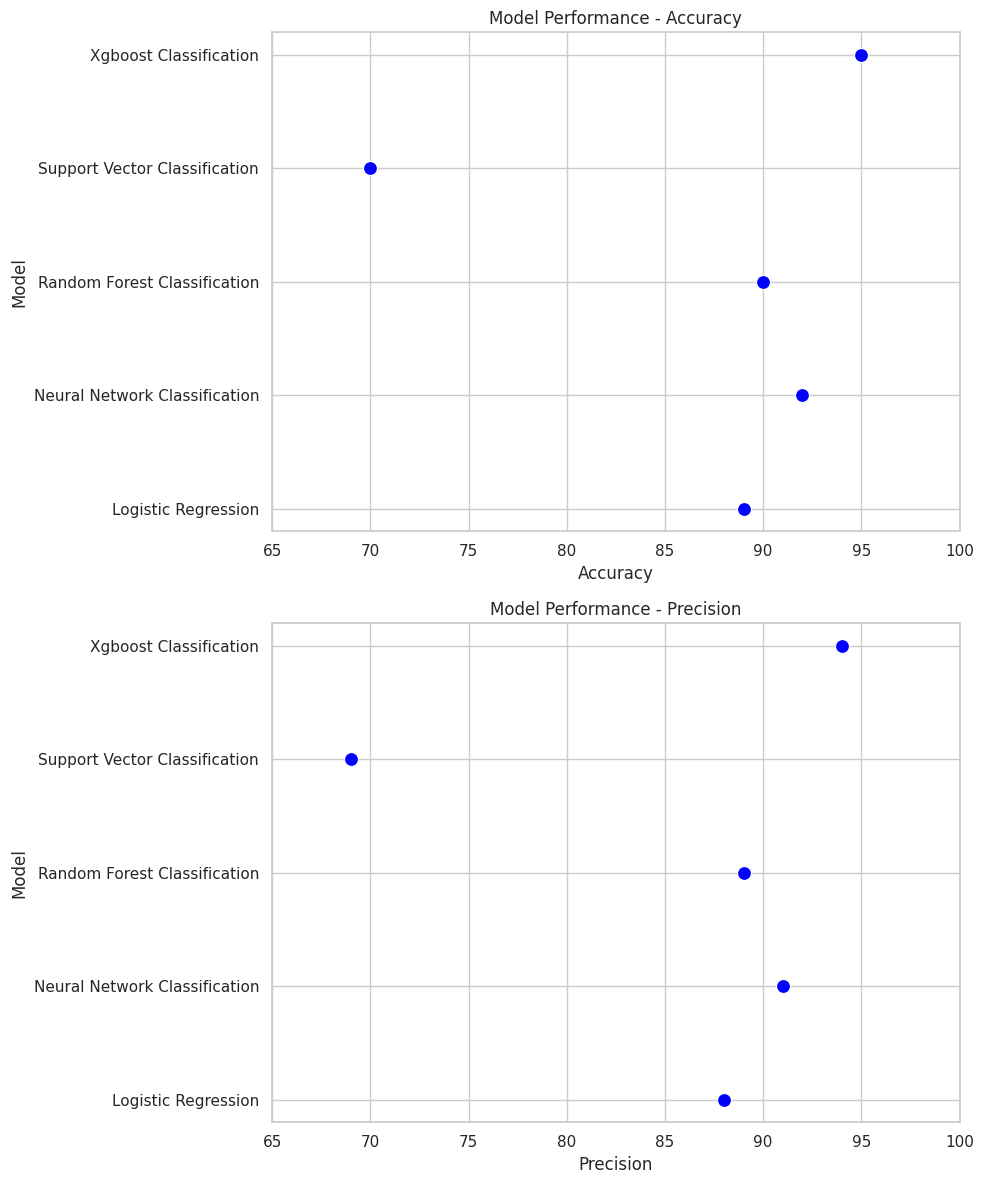

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data for model performance
data = {
    'Model': ['Xgboost Classification', 'Support Vector Classification', 'Random Forest Classification', 'Neural Network Classification', 'Logistic Regression'],
    'Accuracy': [95, 70, 90, 92, 89],
    'Precision': [94, 69, 89, 91, 88]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot Accuracy
sns.scatterplot(x='Accuracy', y='Model', data=df, ax=ax[0], s=100, color='blue')
ax[0].set_title('Model Performance - Accuracy')
ax[0].set_xlim(65, 100)

# Plot Precision
sns.scatterplot(x='Precision', y='Model', data=df, ax=ax[1], s=100, color='blue')
ax[1].set_title('Model Performance - Precision')
ax[1].set_xlim(65, 100)

# Display the plots
plt.tight_layout()
plt.show()
